# Projeto de Classificação de doenças cardiovasculares

## O objetivo do projeto é classificar se um indivíduo possui, ou não, doenças cardiovasculares, a partir de certas informações levantadas em consulta médica.

### Foi utilizado Cardiovascular Disease dataset, disponível no kaggel, e poderá ser consultado no link abaixo.

https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

### Dicionário de dados:

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |



### Importação dos módulos que serão utilizados no projeto

In [1]:
# Importação de módulos básicos, divisão do conjunto de dados e métricas de avaliação dos modelos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.metrics import f1_score, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Importando classificadores

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


Importando os dados e dando uma primeira conferida

In [2]:
# importando os dados e visualizando as 10 primeiras linhas

df = pd.read_csv("cardio_train.csv", sep = ";"); df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


Conferindo os tipos de dados, possíveis dados faltantes e mais alguns aspectos do nosso conjunto de dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
# renomeando as colunas para uma compreensão mais rápida na análise

df.columns = ["id", "idade", "genero", "altura", "peso", "pressao_sist", "pressao_diast", "colesterol", "glicose", "fumante", "ing_alcool", "atividade_fis", "cardio"]
df.head()

,id,idade,genero,altura,peso,pressao_sist,pressao_diast,colesterol,glicose,fumante,ing_alcool,atividade_fis,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Como a coluna 'id' não terá serventia, iremos exclui-la

In [5]:
# Excluindo 'id'

df.drop('id', axis = 1, inplace = True)

Procurando dados duplicados com o método duplicated() e sum() para descobrirmos quantos são

In [6]:
# contagem de dados duplicados

df.duplicated().sum()

24

In [7]:
# Dando uma olhada nas duplicadas antes de exclui-las
duplicadas = df[df.duplicated(keep = False)]

In [8]:
# Vamos ordená-las para ficar mais fácil de enxergar os valores duplicados
duplicadas.sort_values(by = 'idade').head(10)

,idade,genero,altura,peso,pressao_sist,pressao_diast,colesterol,glicose,fumante,ing_alcool,atividade_fis,cardio
40365,14552,1,158,64.0,120,80,1,1,0,0,1,0
6325,14552,1,158,64.0,120,80,1,1,0,0,1,0
64169,16160,1,168,65.0,120,80,1,1,0,0,1,1
17101,16160,1,168,65.0,120,80,1,1,0,0,1,1
1204,16793,1,165,68.0,120,80,1,1,0,0,1,0
21784,16793,1,165,68.0,120,80,1,1,0,0,1,0
28300,16805,1,157,67.0,120,80,1,1,0,0,1,0
60474,16805,1,157,67.0,120,80,1,1,0,0,1,0
44653,16937,2,170,70.0,120,80,1,1,0,0,0,0
10494,16937,2,170,70.0,120,80,1,1,0,0,0,0


In [9]:
# Excluindo os valores duplicados do nosso conjunto de dados e verificando se teremos ainda algum valor duplicado.

df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

Como podemos conferir no dicionário de dados, a coluna idade está calculada em dias e isso torna a análise pouco intuitiva. Vamos ainda transformar a coluna altura(cm) para Metros. 
Nenhum desses passos é obrigatório, mas facilita a análise. Além disso precisaremos da altura em metros quando formos criar uma coluna com o IMC.



In [10]:
# transformando para anos a idade e para metros a altura.

df.idade = (df.idade / 365).round().astype('int')
df.altura = df.altura / 100
df.head()

,idade,genero,altura,peso,pressao_sist,pressao_diast,colesterol,glicose,fumante,ing_alcool,atividade_fis,cardio
0,50,2,1.68,62.0,110,80,1,1,0,0,1,0
1,55,1,1.56,85.0,140,90,3,1,0,0,1,1
2,52,1,1.65,64.0,130,70,3,1,0,0,0,1
3,48,2,1.69,82.0,150,100,1,1,0,0,1,1
4,48,1,1.56,56.0,100,60,1,1,0,0,0,0


In [11]:
# Verificando a existência de valores faltantes(miss values) no nosso df

df.isnull().sum().any()

False

# Análise Exploratória

In [12]:
df.describe()

,idade,genero,altura,peso,pressao_sist,pressao_diast,colesterol,glicose,fumante,ing_alcool,atividade_fis,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,53.338945,1.349648,1.643592,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,6.765633,0.476862,0.082112,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,30.000000,1.000000,0.550000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,1.590000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,1.650000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,1.700000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,2.500000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Acima vemos algumas informações que nos sugerem possíveis erros, e precisaremos olhar com mais cuidado um pouco a frente, são elas: altura, peso, pressão sistólica e pressão diastólica.

O dicionário de dados não deixa claro se o 1, da coluna genero, se refere aos homens ou mulheres. Para tentarmos identificar quem é quem, vamos assumir que a média de altura entre os homens é superior a das mulheres.
Vamos agrupar os dados por gênero e aplicar a média para a altura.


In [13]:
# Agrupando e tirando a média da altura por gênero
df.altura.groupby(df.genero).mean().round(2)

genero
1    1.61
2    1.70
Name: altura, dtype: float64

A média para o número 2 é superior, portanto assumiremos que o 1 é para mulheres.

Vamos analisar a coluna 'cardio', para sabermos se os dados estão balanceados ou não.
A importância de que os dados estejam balanceados, é para evitarmos que os nossos modelos aprendam mais sobre alguma categoria do que outras. 
Por exemplo: Se tivermos um conjunto de dados em que 80% dos dados é de indivíduos que não possuem doenças cardiovasculares, nosso modelo poderá ter uma boa acurácia para identificar estes indivíduos, e não tão boa para os demais.

In [14]:
# Conferindo o balanceamento dos dados

df.cardio.value_counts()

0    35004
1    34972
Name: cardio, dtype: int64

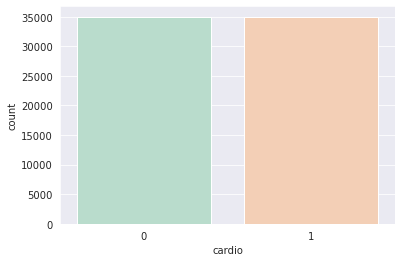

In [15]:
# Graficamente para o balanceamento
sns.set_style("darkgrid")
sns.countplot(x = 'cardio', data = df, palette = 'Pastel2');

Ocorrência entre homens e mulheres.

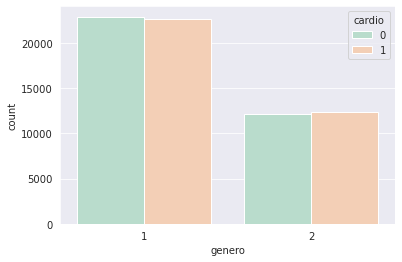

In [16]:
# cardio x gênero

sns.countplot(x = 'genero', hue = 'cardio', data = df, palette = 'Pastel2');

Ocorrência por idade, para analisarmos graficamente uma possível relação entre o aumento da idade e as DCV.

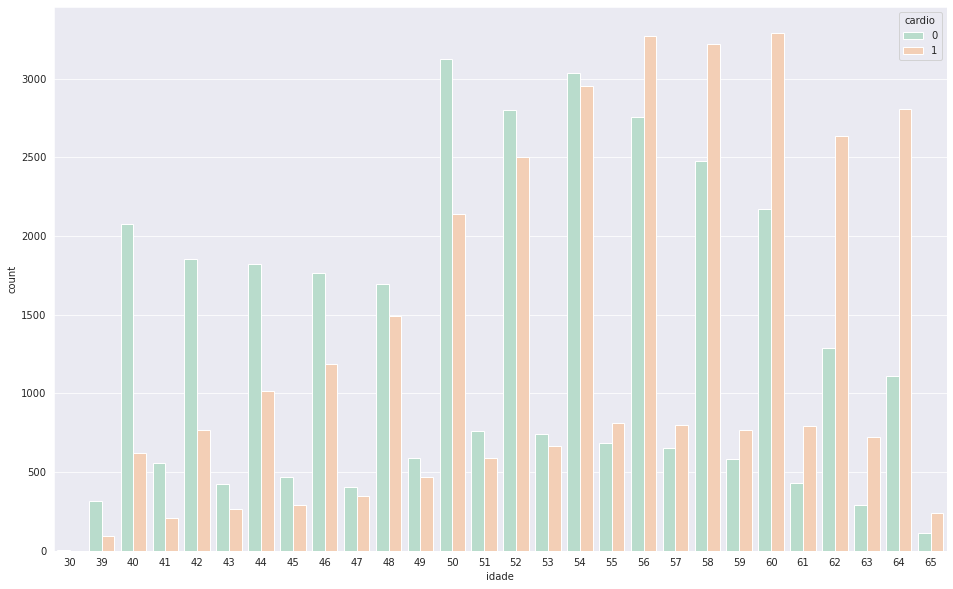

In [17]:
# Ocorrência por idade
plt.figure(figsize =[16, 10])
sns.countplot(x = 'idade', hue = 'cardio', data = df, palette = 'Pastel2');


Pode-se observar claramente uma maior tendência de doenças cardiovasculares a medida que a idade aumenta.
Observe que, a partir dos 55 anos, a barra que aponta a presença de doenças cardiovasculares(alaranjada) ultrapassa a de não ocorrência em todas as idades.

Vamos segmentar ainda mais a nossa análise, e verificar por idade e gênero.

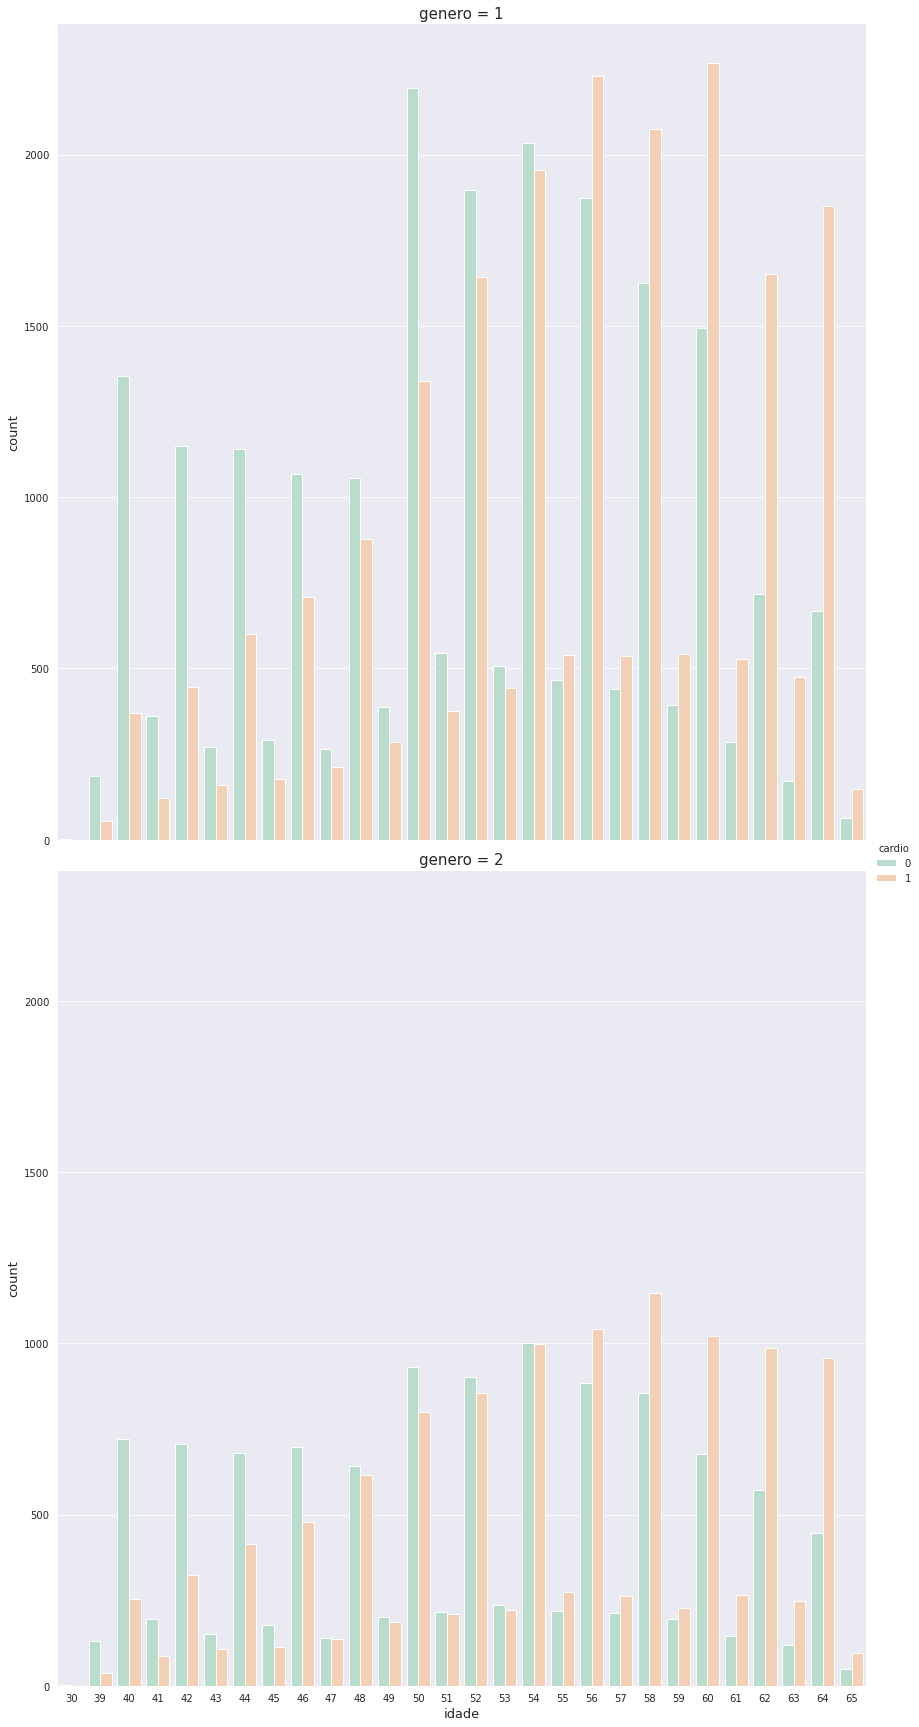

In [18]:
# ocorrências x idade x gênero.
g = sns.catplot(x = 'idade', hue = 'cardio', row = 'genero', kind = 'count', data = df, palette = 'Pastel2', height = 12)
g.set_titles(size = 15)
g.set_xlabels(size = 13)
g.set_ylabels(size = 13);

A tendência se observa tanto entre os homens como entre as mulheres, porém entre o sexo feminino o aumento é mais expressivo.

Vamos analisar agora as ocorrências sob outros aspectos.

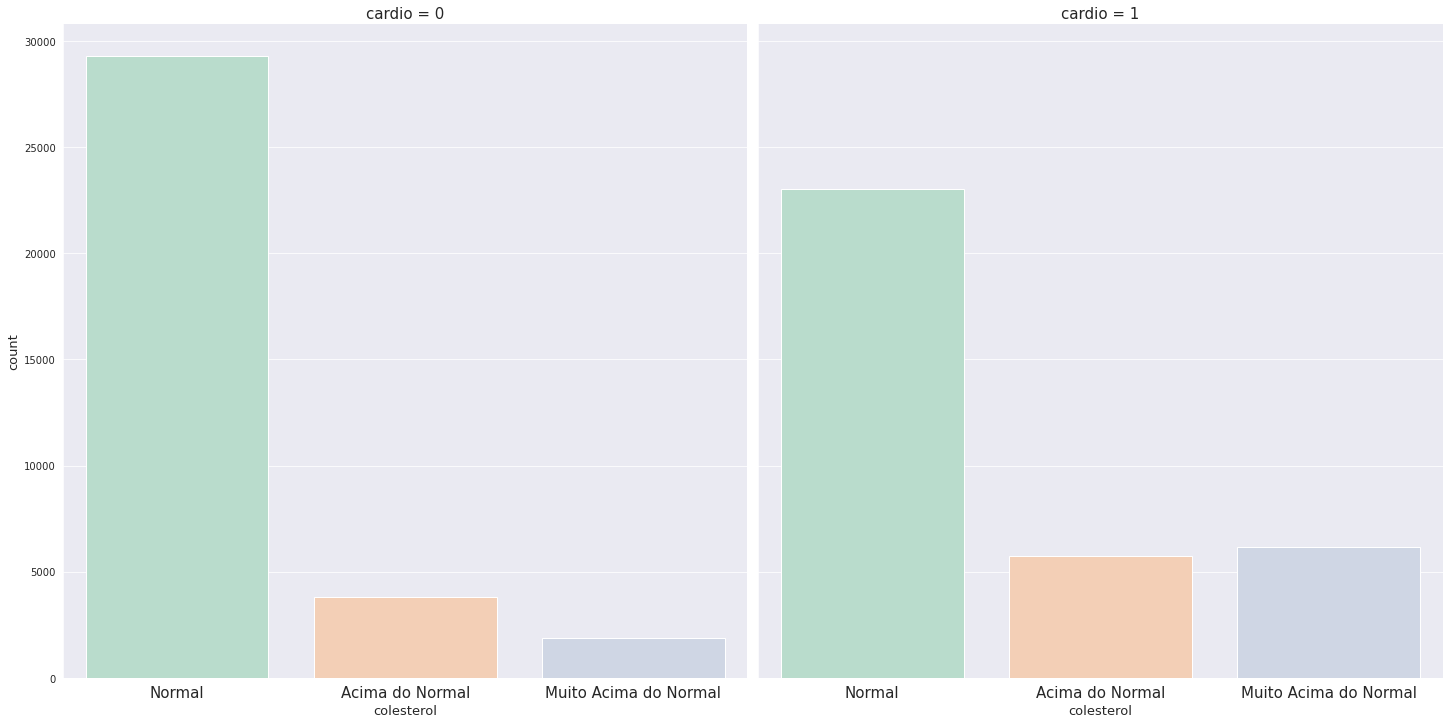

In [19]:
g = sns.catplot(x = 'colesterol', col = 'cardio', kind = 'count', data = df,
            palette = 'Pastel2',
            height = 10)
g.set_xticklabels(['Normal', 'Acima do Normal', 'Muito Acima do Normal'], size = 15)
g.set_titles(size = 15)
g.set_xlabels(size = 13)
g.set_ylabels(size = 13);


Pelo gráfico acima fica claro que entre os pacientes que apresentam DCV, é mais frequente a presença de colesterol alto.

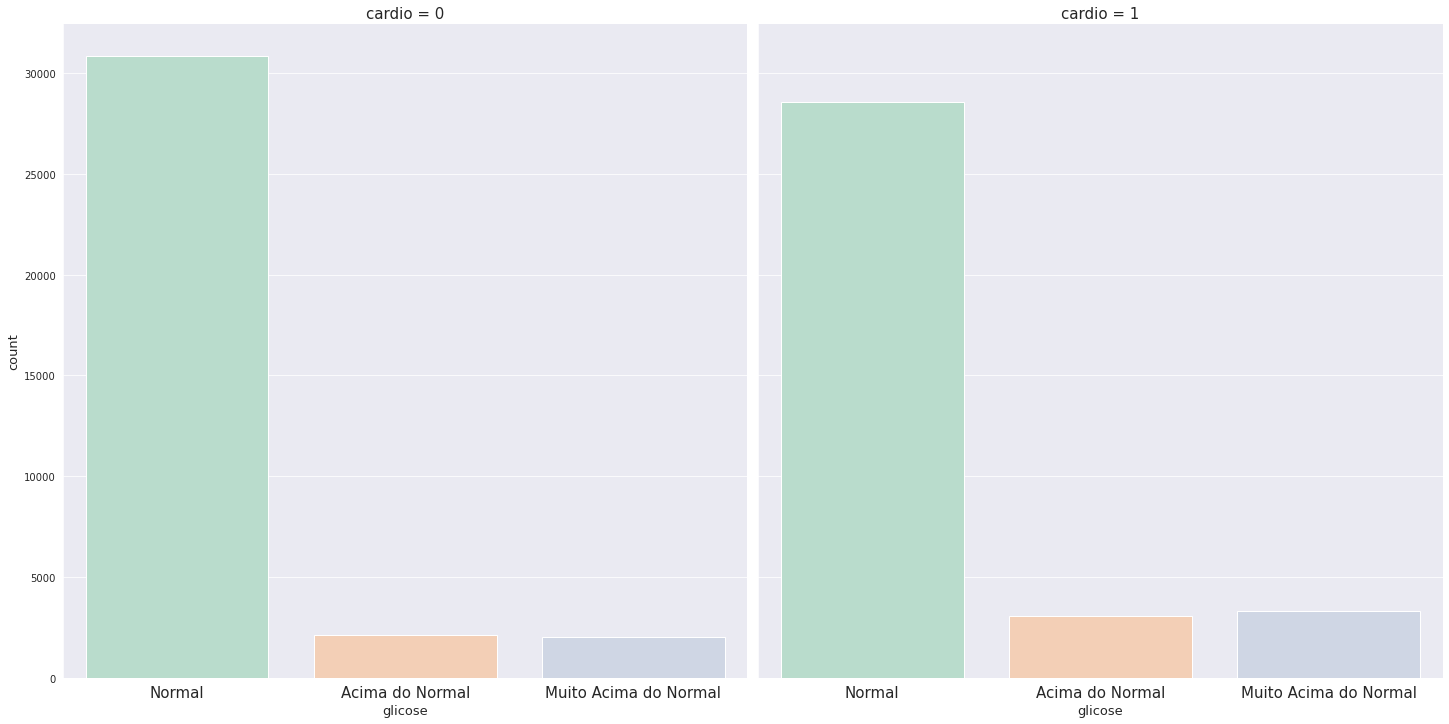

In [20]:
g = sns.catplot(x = 'glicose', col = 'cardio', kind = 'count', data = df,
            palette = 'Pastel2',
            height = 10)
g.set_xticklabels(['Normal', 'Acima do Normal', 'Muito Acima do Normal'], size = 15)
g.set_titles(size = 15)
g.set_xlabels(size = 13)
g.set_ylabels(size = 13);

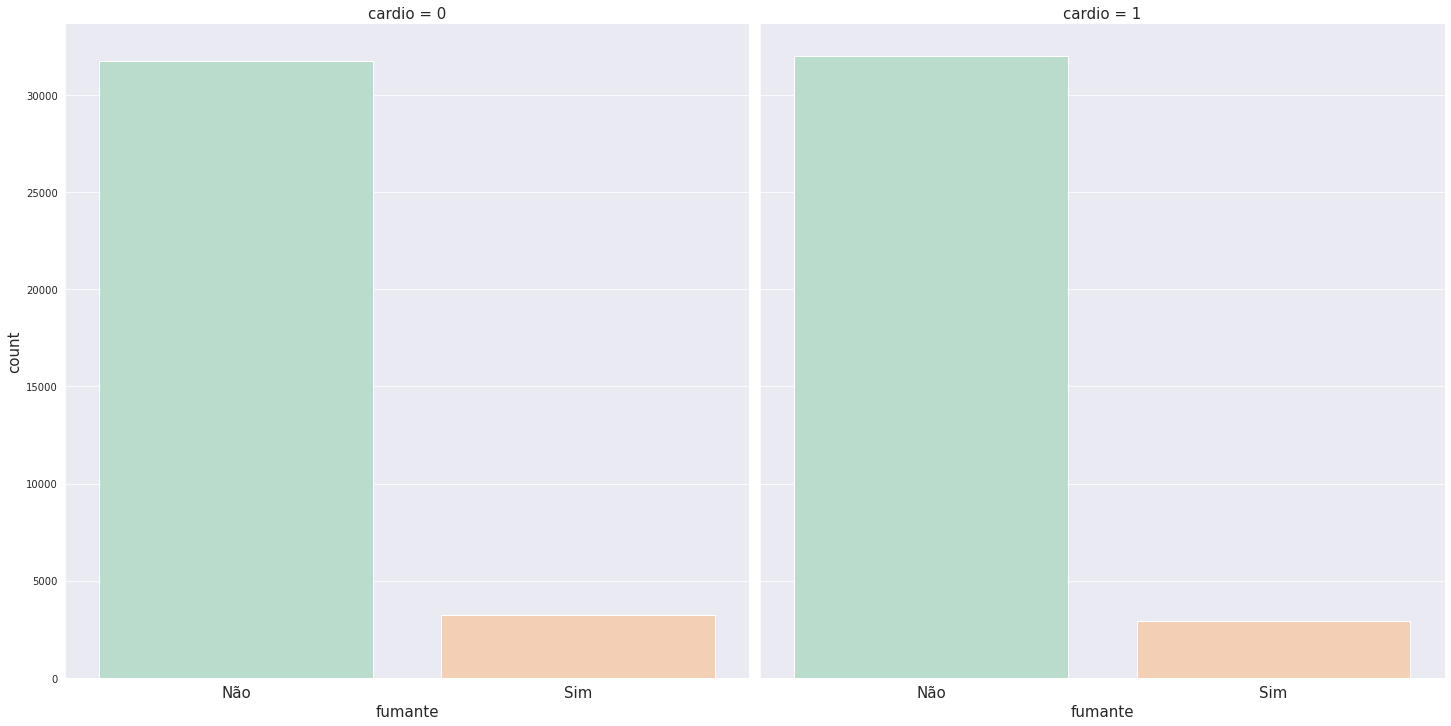

In [21]:
g = sns.catplot(x = 'fumante', col = 'cardio', kind = 'count', data = df,
            palette = 'Pastel2',
            height = 10)
g.set_xticklabels(['Não', 'Sim'], size = 15)
g.set_titles(size = 15)
g.set_xlabels(size = 15)
g.set_ylabels(size = 15);

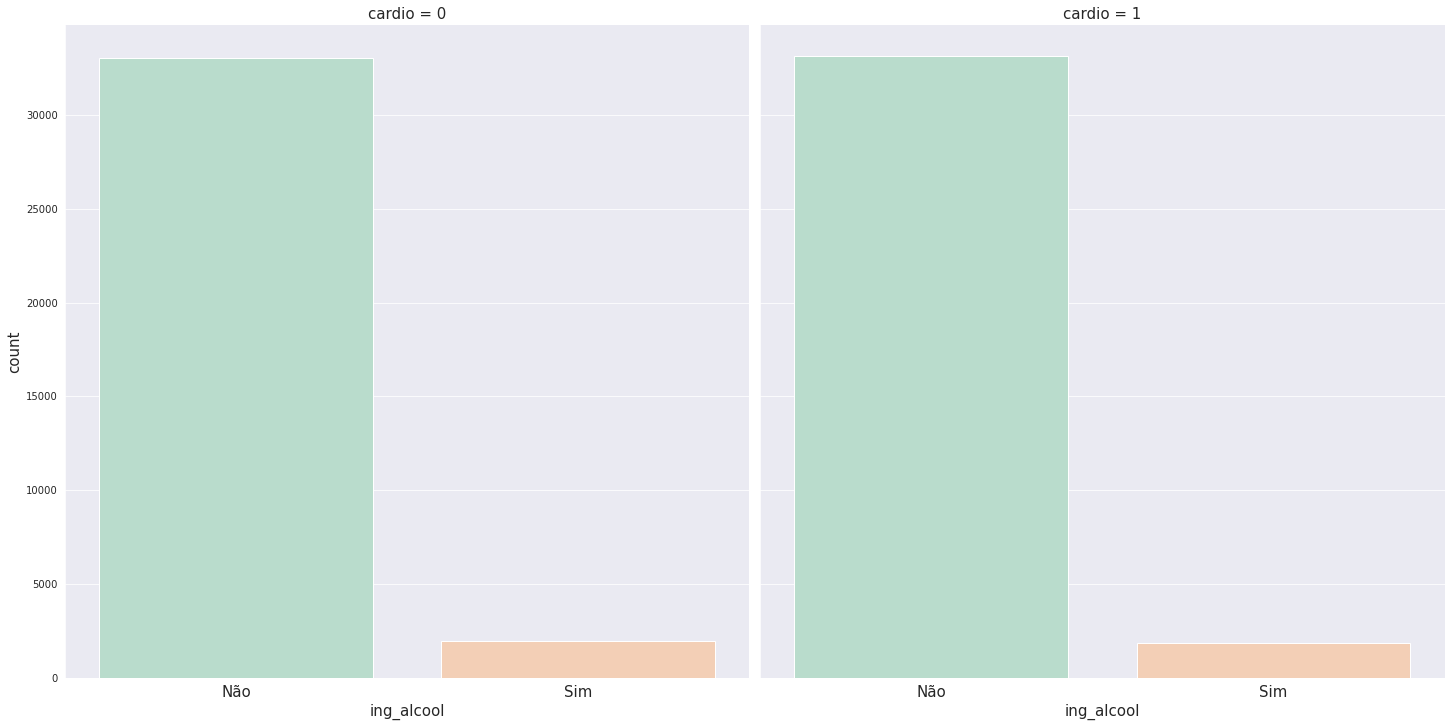

In [22]:
g = sns.catplot(x = 'ing_alcool', col = 'cardio', kind = 'count', data = df,
            palette = 'Pastel2',
            height = 10)
g.set_xticklabels(['Não', 'Sim'], size = 15)
g.set_titles(size = 15)
g.set_xlabels(size = 15)
g.set_ylabels(size = 15);

Assim como no caso do colesterol, é possível ver uma relação entre a incidência de DCV e níveis elevados de glicose, o que não significa uma relação de causalidade.
Quanto a ser fumante ou ingerir bebidas alcoólicas, individualmente não é possível observar relação entre a ocorrência, pelo menos não expressivamente.

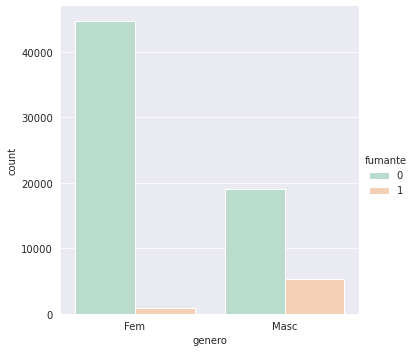

In [23]:
g = sns.catplot(x = 'genero', hue = 'fumante', kind = 'count', data = df, palette = 'Pastel2')
labels = ['Fem', 'Masc']
g.set_xticklabels(labels);



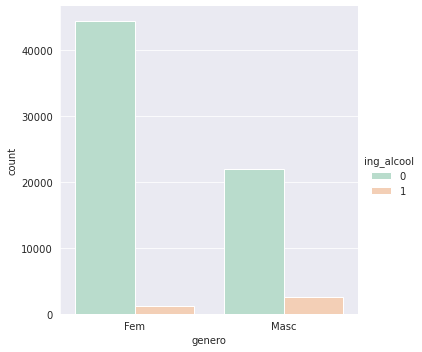

In [24]:
g = sns.catplot(x = 'genero', hue = 'ing_alcool', kind = 'count', data = df, palette = 'Pastel2')
labels = ['Fem', 'Masc']
g.set_xticklabels(labels);

Os homens são maioria entre os fumantes e aquels que ingerem álcool.

## Limpando os dados

### Agora vamos voltar nas variáveis que apresentaram valores, para dizer o mínimo, estranhos.

Para que seja possível colocar mais de uma variável, vamos fazer uma fusão dos dados.

In [25]:
x_melt_pres = pd.melt(df, value_vars = ['pressao_sist', 'pressao_diast'], var_name = 'variaveis', value_name = 'valor')
x_melt_pres.head()

,variaveis,valor
0,pressao_sist,110
1,pressao_sist,140
2,pressao_sist,130
3,pressao_sist,150
4,pressao_sist,100


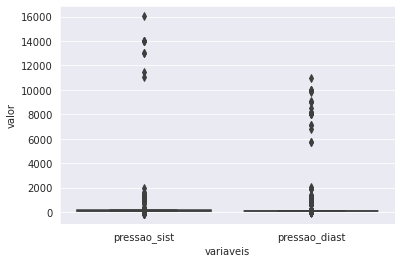

In [26]:
# Analisando a pressão
sns.boxplot(x = 'variaveis', y = 'valor', data = x_melt_pres);

Não é necessário ser um especialista na área médica para enxergar que, certamente, há erros nesses dados. Basta uma pesquisa rápida para sabermos que alguns dos valores acima estão totalmente fora da realidade.

In [27]:
df.loc[:, ['pressao_sist', 'pressao_diast']].describe()

,pressao_sist,pressao_diast
count,69976.000000,69976.000000
mean,128.820453,96.636261
std,154.037729,188.504581
min,-150.000000,-70.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
max,16020.000000,11000.000000


Como observado na descrição dos dados acima, há valores negativos para a pressão, e isso é impossível. Vamos contar quantos temos.

In [28]:
(df[(df['pressao_sist'] < 0) | (df['pressao_diast'] < 0)].count().filter(('pressao_sist', 'pressao_diast')))

pressao_sist     8
pressao_diast    8
dtype: int64

Aqui faremos a opão de excluir as observações em que tivermos valores negativos para a pressão arterial.

In [29]:
df.drop(df[(df['pressao_sist'] < 0) | (df['pressao_diast'] < 0)].index, inplace = True)

In [30]:
df.loc[:, ['pressao_sist', 'pressao_diast']].describe()

,pressao_sist,pressao_diast
count,69968.000000,69968.000000
mean,128.847044,96.640450
std,154.025612,188.514207
min,1.000000,0.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
max,16020.000000,11000.000000


Para tratar os valores extremos superiores, faremos a opção de substitui-los pela mediana, pois quando pegamos referências em sites médicos de valores para pressão, vemos que a mediana dos nossos dados pode ser usada como uma boa medida, tanto para a pressão sistólica, como para a diastólica.
Considerarei outlier todo valor que estiver acima de 250 e abaixo de 80 para a sistólica, e maior que 200 e menor que 40 para a diastólica.

In [31]:
df.pressao_sist[(df['pressao_sist'] > 250) | (df['pressao_sist'] < 80)] = df['pressao_sist'].median()

In [32]:
df.pressao_diast[(df['pressao_diast'] > 200) | (df['pressao_diast'] < 40)] = df['pressao_diast'].median()

Por último iremos conferir se há algum observação em que a pressão diastólica é superior à sistólica, pois isso também não é normal.



In [33]:
df[df['pressao_sist'] < df['pressao_diast']]

,idade,genero,altura,peso,pressao_sist,pressao_diast,colesterol,glicose,fumante,ing_alcool,atividade_fis,cardio
474,52,1,1.56,65.0,120,150,2,1,0,0,1,0
2384,64,1,1.54,102.0,90,150,1,1,0,0,0,1
2990,60,2,1.82,90.0,80,140,3,3,0,0,1,1
3447,55,2,1.80,80.0,80,125,3,3,1,1,1,1
3623,60,1,1.60,83.0,80,120,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
66315,62,1,1.69,88.0,120,160,3,3,0,0,0,1
66657,53,2,1.60,81.0,80,120,3,3,1,1,1,1
67421,64,1,1.53,74.0,80,130,1,1,0,0,1,1
67470,58,2,1.72,57.0,80,120,1,1,1,0,1,1


In [34]:
# Excluindo observações acima.

df.drop(df[df['pressao_sist'] < df['pressao_diast']].index, inplace = True)

Vamos olhar graficamente como ficaram nossas duas variáveis.

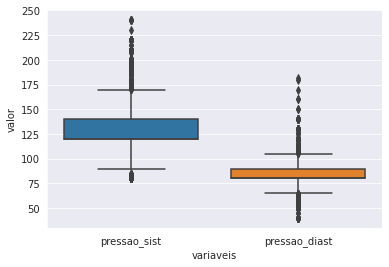

In [35]:
x_melt_pres = pd.melt(df, value_vars = ['pressao_sist', 'pressao_diast'], var_name = 'variaveis', value_name = 'valor')
sns.boxplot(x = 'variaveis', y = 'valor', data = x_melt_pres);

Agora iremos analisar e tratar as variáveis altura e peso.

Com o método sort_values iremos ordenar por 'altura', para conserguirmos olhar mais facilmente os valores extremos

In [36]:
# Ordenando os dados pela coluna altura e visualizando os 10 primeiros valores.
df.sort_values(by = 'altura').head(10)

,idade,genero,altura,peso,pressao_sist,pressao_diast,colesterol,glicose,fumante,ing_alcool,atividade_fis,cardio
22723,64,1,0.55,81.0,130,90,1,1,0,0,1,1
66643,52,1,0.57,61.0,130,90,1,1,0,0,1,1
64115,50,1,0.59,57.6,125,67,1,1,0,0,0,0
29157,52,1,0.60,69.0,110,70,1,1,0,0,0,0
27603,57,1,0.64,61.0,130,70,1,1,0,0,1,0
33607,54,2,0.65,72.0,130,80,1,1,0,0,0,0
44490,52,1,0.65,60.0,120,80,1,1,0,0,1,0
64454,58,1,0.66,63.0,120,80,1,1,0,0,0,1
50789,40,2,0.67,60.0,110,80,1,1,1,1,1,0
14323,60,1,0.67,57.0,120,90,1,1,0,0,1,1


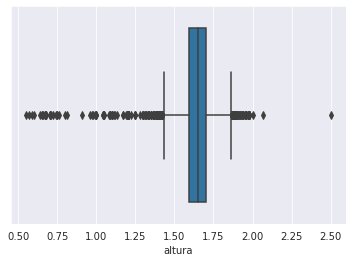

In [37]:
sns.boxplot(x = 'altura', data = df);

Olhando para os dados, podemos fazer algumas ponderações: Ainda que tenhamos pessoas nos dados que sofram de nanismo, e por isso tenham idade adulta e pouca altura, é inimaginável que alguém nestas condições, com 55cm de altura, pese 81 Kg, o que nos sugere um erro de coleta.
Para tratar estes dados, usarei a média das alturas para substituir os valores. 
Porém, como sabemos que a média de altura entre homens e mulheres é diferente, vamos considerar isto na substituição para uma melhor aproximação.

In [38]:
df.altura[(df.altura < 1.40) & (df.genero == 1)] = 1.61
df.altura[(df.altura == 2.50) & (df.genero == 1)] = 1.61
df.altura[(df.altura < 1.40) & (df.genero == 2)] = 1.70

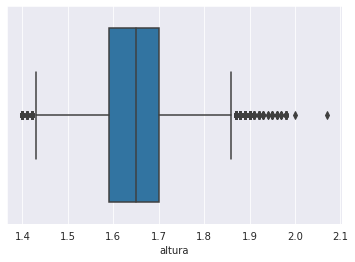

In [39]:
sns.boxplot(x = 'altura', data = df);

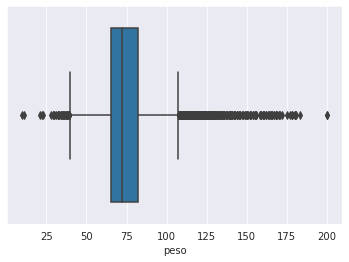

In [40]:
sns.boxplot(x = 'peso', data = df);

Vamos usar o método tail para visualizar as últimas 5 linhas do nosso dataset, ordenado por 'peso'

In [41]:
df.sort_values(by = 'peso').tail()

,idade,genero,altura,peso,pressao_sist,pressao_diast,colesterol,glicose,fumante,ing_alcool,atividade_fis,cardio
60592,52,2,1.80,180.0,140,100,3,1,0,0,1,1
36780,54,1,1.61,181.0,180,80,2,1,0,0,1,1
61285,57,2,1.80,183.0,110,80,3,3,0,1,1,1
435,46,1,1.86,200.0,130,70,1,1,0,0,0,0
50413,41,2,1.80,200.0,150,90,1,1,0,0,1,1


In [42]:
df.peso.describe()

count    69876.000000
mean        74.204309
std         14.397590
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: peso, dtype: float64

Para os outliers do peso fiz a escolha de excluir todos os dados que forem maiores que o percentil 99 e menor que o 1.

In [43]:
df.drop(df[(df['peso'] > df['peso'].quantile(0.99)) | (df['peso'] < df['peso'].quantile(0.01))].index, inplace = True)

In [44]:
# Verificando se, após a limpeza dos dados, foi gerado algum valor faltante.
df.isnull().sum().any()

False

Seria interessante se tivéssemos alguma feature que pudesse classificar os pacientes pelo seu Indice de Massa Corporal, o IMC. Isso podemos resolver criando uma nova feature, pois temos todos os dados que precisamos para isso.

In [45]:
# Criando uma coluna 'IMC'
df['IMC'] = df['peso'] / (df['altura'] ** 2)

In [46]:
# Vamos conferir nossa nova feature
df['IMC'].describe()

count    68553.000000
mean        27.363923
std          4.818530
min         14.577259
25%         23.875115
50%         26.365603
75%         30.103806
max         58.024202
Name: IMC, dtype: float64

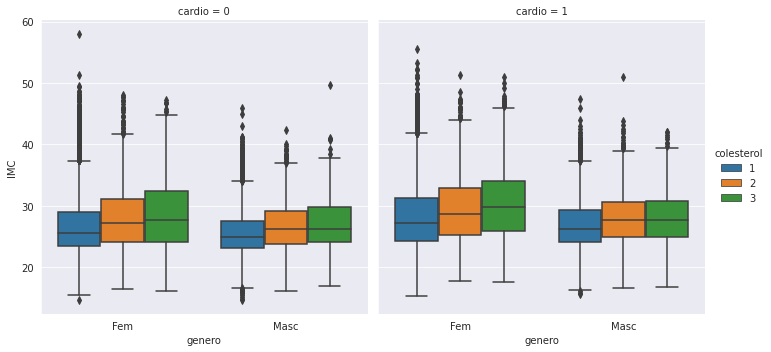

In [47]:
g = sns.catplot(x = 'genero', y = 'IMC', hue = 'colesterol', col = 'cardio', data = df, kind = 'box')
labels = ['Fem', 'Masc']
g.set_xticklabels(labels);

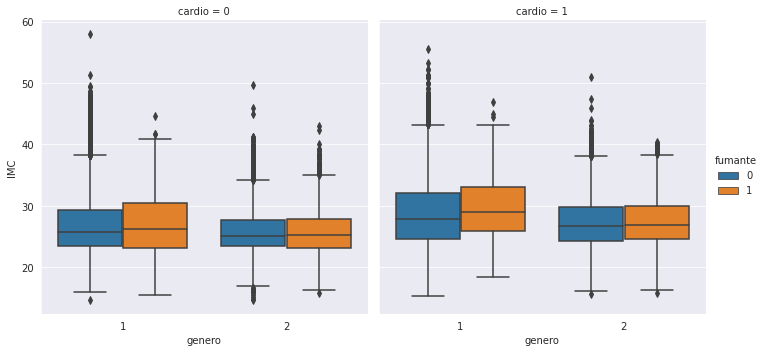

In [48]:
sns.catplot(x = 'genero', y = 'IMC', hue = 'fumante', col = 'cardio', data = df, kind = 'box');

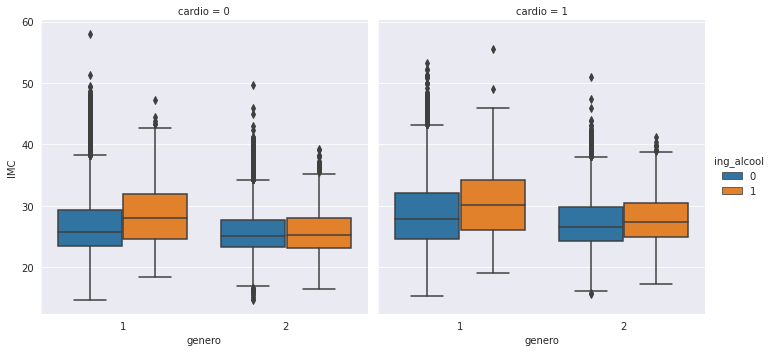

In [49]:
sns.catplot(x = 'genero', y = 'IMC', hue = 'ing_alcool', col = 'cardio', data = df, kind = 'box');

In [50]:
# Dimensões finais do nosso df
df.shape

(68553, 13)

Analisando graficamente a correlação entre as variáveis. A escala de correlações vai de -1 a 1, onde os extremos seriam as correlações perfeitas.
Os valores positivos indicam uma relação positiva entre as variáveis, ou seja, a medida que uma cresce a outra também tende a crescer. Com valores negativos as relações se invertem.

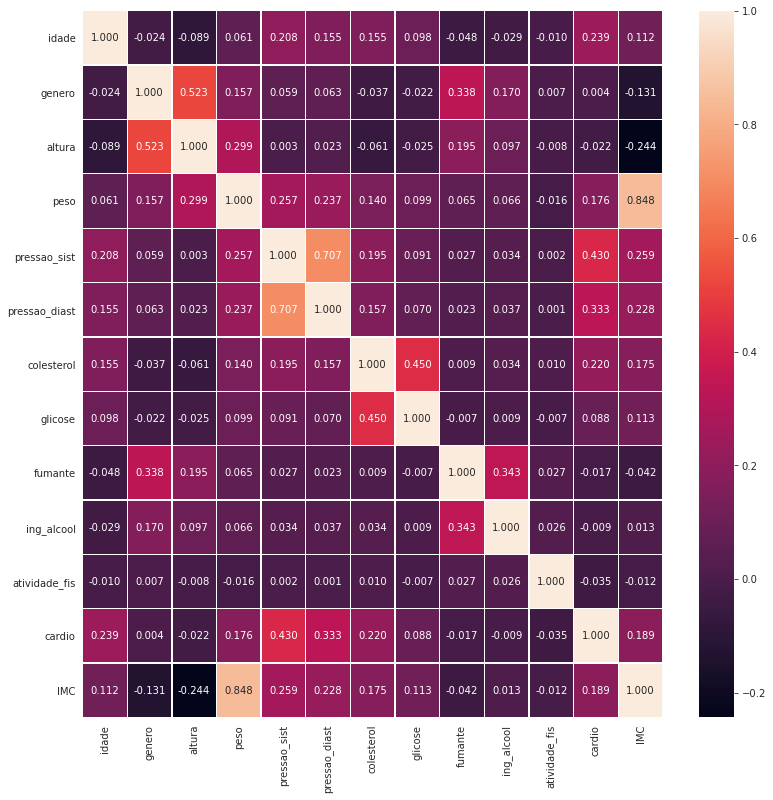

In [51]:
# Vamos ver a correlação entre as variáveis

corr = df.corr()

fig, ax = plt.subplots(figsize = (13, 13))
sns.heatmap(corr, annot = True, fmt = '.3f', linewidths = 0.3, ax = ax);

Podemos ver que as features com relação mais forte com a incidência de doenças cardiovasculares são: IMC, colesterol, pressao_sist, pressao_diast, peso e idade. Apesar de glicose não ter forte correlação, vale a pena ficar atento, pois ela tem uma forte relação com o colesterol, que por sua vez, possui relação com o cardio.

## Divisão dos dados e normalização

In [52]:
# Separando os dados entre variáveis dependentes e independentes.
df_y = df['cardio']
df_x = df
df_x.drop('cardio', axis = 1, inplace = True);
df_y.shape


(68553,)

In [53]:
df_x.head()

,idade,genero,altura,peso,pressao_sist,pressao_diast,colesterol,glicose,fumante,ing_alcool,atividade_fis,IMC
0,50,2,1.68,62.0,110,80,1,1,0,0,1,21.967120
1,55,1,1.56,85.0,140,90,3,1,0,0,1,34.927679
2,52,1,1.65,64.0,130,70,3,1,0,0,0,23.507805
3,48,2,1.69,82.0,150,100,1,1,0,0,1,28.710479
4,48,1,1.56,56.0,100,60,1,1,0,0,0,23.011177


Vamos separar nosso conjunto de dados em treino e teste, para então aplicar uma padronização.

In [54]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.30)

In [55]:
# Normalizando os dados com StandardScaler

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Modelagem Preditiva

Primeiro farei um apanhado geral de 5 algoritmos de classificação para ter uma ideia inicial do seu desempenho, para então decidir em qual focar e tentar otimizar.

In [56]:
classificadores = {
    'Regressão Logística': LogisticRegression(),
    'Support Vector Machines': SVC(),
    'Árvore de Decisão': DecisionTreeClassifier(),
    'Floresta Randômica': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

resultado = pd.DataFrame(columns = ['Acurácia %', 'F1-score'])

for alg, func in classificadores.items():
    func.fit(x_train, y_train)
    previsao = func.predict(x_test)
    resultado.loc[alg] = [round((accuracy_score(y_test, previsao)*100), 3), round(f1_score(y_test, previsao), 3)]

In [57]:
resultado

,Acurácia %,F1-score
Regressão Logística,72.975,0.713
Support Vector Machines,73.476,0.716
Árvore de Decisão,63.829,0.632
Floresta Randômica,71.166,0.708
KNN,69.994,0.695


Vamos usar o algoritmo GridSearchCV para buscar os melhores parâmetros para a nossa Floresta Randômica

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
param_grid = {
    'n_estimators': [150, 300],
    'max_features': [3, 4],
    'min_samples_leaf': [1, 3],
}

grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)
grid_rfc.fit(x_train, y_train)
grid_rfc.best_params_

{'max_features': 3, 'min_samples_leaf': 3, 'n_estimators': 150}

In [60]:
print('Melhor Score: {:.2f}'.format(grid_rfc.best_score_ * 100))

Melhor Score: 72.83


In [61]:
grid_rfc_prev = grid_rfc.predict(x_test)

In [62]:
print('Acurácia: {:.3f} | F1-Score: {:.3f}'.format(accuracy_score(y_test, grid_rfc_prev)* 100, f1_score(y_test, grid_rfc_prev)* 100))

Acurácia: 73.471 | F1-Score: 72.355


Tentando otimizar o modelo de Regressão Logística

In [63]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.0001, 0.001, 0.01, 0.10, 0.1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

grid_rl = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid_rl.fit(x_train, y_train)
grid_rl.best_params_
print('Melhor Score: {:.3f}'.format(grid_rl.best_score_ * 100))

Melhor Score: 72.755


In [64]:
grid_rl.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

In [65]:
grid_rl_prev = grid_rl.predict(x_test)


In [66]:
print('Acurácia: {:.3f} | F1-Score: {:.3f}'.format(accuracy_score(y_test, grid_rl_prev)* 100, f1_score(y_test, grid_rl_prev)* 100))

Acurácia: 72.975 | F1-Score: 71.274


Utilizando o GridSearchCV foi possível otimizar o RandomForest de 71 para 73%, já o LogisticRegression não teve melhora significativa.
Ainda seria possível tentar fazer mais alguns ajustes, para tentarmos otimizar mais alguma coisa, mas foge o escopo deste projeto, então vamos parar por aqui.